## A Recommendation System is built on Amazon Rating dataset which contains user rating of over 2 million Beauty Products

## https://www.kaggle.com/skillsmuggler/amazon-ratings

In [1]:
# Import Dataset
import numpy as np
import pandas as pd 

# This notebook was run on Kaggle kernel, so we find the file path.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-ratings/ratings_Beauty.csv


In [2]:
# Import Fast.ai library for collaborative filering and tabular data.
from fastai.collab import *
from fastai.tabular import *
from fastai import *
from fastai.vision import *

In [3]:
# Amazon Rating dataset contains UserId, ProductId and Rating from a scale of 0 to 5.
amazon_rating= pd.read_csv('/kaggle/input/amazon-ratings/ratings_Beauty.csv')

In [19]:
#The dataset has over 2 million rows
len(amazon_rating)

2023070

In [15]:
amazon_rating.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [6]:
# A data bunch is creatured which splits the data into training and validation set and converts it into a format suitable for
# Collaborative Filtering algorithm.
amazon_data = CollabDataBunch.from_df(amazon_rating)

In [7]:
y_range = [0,5]

### Collaborative Filtering suggests products to the user based on the product purchases of similar users.
### A popular technique for Collaborative Filtering is Matrix Factorization in which a Sparse User-Item matrix is split into two small user and item matrices which represent the huge original matrix using small 'n' number of features that capture the important features used to describe the user/item. 
### W=UxV where W is the original matrix and U and V are the user and item matrix respectively.

<img src="images/1.png">

In [8]:
# Collaborative Filtering(Matrix Factorization) matrix has 60 features.
learn = collab_learner(amazon_data, n_factors=60, y_range=y_range)

In [9]:
# We find a suitable learning rate for the Collaborative Filtering algorithm
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


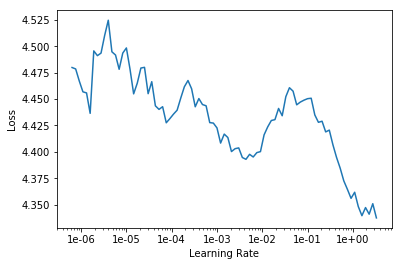

In [10]:
# The optimum learning rate is 1e-03.
learn.recorder.plot()

In [11]:
# The algorithm is trained for 5 iterations. It can be further trained to bring down the validation loss.
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,3.860547,3.842593,07:58
1,3.133043,3.183416,08:09
2,2.577397,2.974749,08:00
3,2.161409,2.913997,08:01
4,2.016696,2.905377,07:59
